In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\Visual Studio\diamond\DiamondsPrices.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 53940 rows and 10 columns


In [5]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

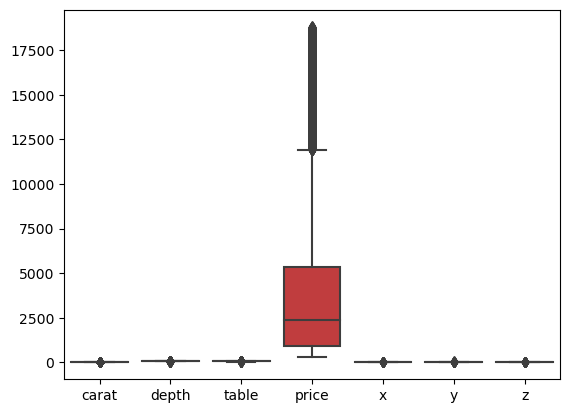

In [6]:
import seaborn as sns
sns.boxplot(df)

In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
df['color'] = df['color'].map({'G':0,'E':1,'F':2,'H':3,'D':4,'I':5,'J':6})
df['cut'] = df['cut'].map({'Ideal':0,'Premium':1,'Very Good':2,'Good':3,'Fair':4})
df['clarity'] = df['clarity'].map({'SI1':0,'VS2':1,'SI2':2,'VS1':3,'VVS2':4,'VVS1':5,'IF':6,'I1':7})

In [13]:
X = df.drop(columns = 'price').values
y = df['price'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import  r2_score
y_pred = regressor.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.8715466744920118


In [18]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,50]: 
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i,"train_score;",knn.score(X_train_scaled,y_train), " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1 train_score; 0.999990438981492  score :  0.9391938523165002
K value  :  2 train_score; 0.9854105269200321  score :  0.9493987078519236
K value  :  3 train_score; 0.9781758061184471  score :  0.9529524173198978
K value  :  4 train_score; 0.9745648137649516  score :  0.9538815790987185
K value  :  5 train_score; 0.9717124215599382  score :  0.9538323124890636
K value  :  6 train_score; 0.9689100712332567  score :  0.9540239460834407
K value  :  7 train_score; 0.9670434196774478  score :  0.9537167639382564
K value  :  8 train_score; 0.9654977170000243  score :  0.95322742761823
K value  :  9 train_score; 0.9640410846986122  score :  0.9524189023450951
K value  :  10 train_score; 0.9625111826122354  score :  0.9518178711719031
K value  :  20 train_score; 0.9536463737557653  score :  0.9464773169652695
K value  :  50 train_score; 0.9402176131474882  score :  0.9357407780408995


In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(6)
knn.fit(X_train_scaled,y_train)
y_pred = knn.score(X_test_scaled,y_test)

In [20]:
from sklearn.metrics import  r2_score
y_pred = knn.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9523583863064852


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(X_train, y_train) 
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) 
  print("depth :",depth, "train_R2 :",trainAccuracy, "val scaore :" ,np.mean(valAccuracy))

depth : 1 train_R2 : 0.6080457898785773 val scaore : 0.6080526491465991
depth : 2 train_R2 : 0.8266083891324901 val scaore : 0.826394444479828
depth : 3 train_R2 : 0.8805749587666414 val scaore : 0.8798905598873947
depth : 4 train_R2 : 0.9082999577691858 val scaore : 0.907183607147175
depth : 5 train_R2 : 0.9250448559623525 val scaore : 0.9237776729770252
depth : 6 train_R2 : 0.9398655677871612 val scaore : 0.937909940662194
depth : 7 train_R2 : 0.9537057650587173 val scaore : 0.9505060691964629
depth : 8 train_R2 : 0.9623244656562014 val scaore : 0.9577394546547362
depth : 9 train_R2 : 0.9710276379181028 val scaore : 0.9641918874555697
depth : 10 train_R2 : 0.9774474734912247 val scaore : 0.9691932344659767
depth : 20 train_R2 : 0.9991919414569145 val scaore : 0.9644175191103429
depth : 40 train_R2 : 0.99999522968039 val scaore : 0.9636694274119728
depth : 60 train_R2 : 0.99999522968039 val scaore : 0.9639424276502819


In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [23]:
from sklearn.metrics import  r2_score
y_pred = dt.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9691684998964987


In [24]:
X.shape

(53940, 9)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [26]:
from sklearn.metrics import  r2_score
y_pred = rf.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.8860096651010657


In [27]:
import pandas as pd 
from pandas import MultiIndex, Int16Dtype
import xgboost as xgb

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBRegressor
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XGBRegressor = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  XGBRegressor.fit(X_train,y_train) 
  XGBRegressor.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", XGBRegressor.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(XGBRegressor, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.6944195751060347  Cross-Val score :  0.6925655916844664
Learning rate :  0.02  Train score :  0.9322266357681483  Cross-Val score :  0.9299328508790132
Learning rate :  0.03  Train score :  0.9702623222941341  Cross-Val score :  0.9674269581054757
Learning rate :  0.04  Train score :  0.9784549989857092  Cross-Val score :  0.9753030872791276
Learning rate :  0.05  Train score :  0.9812931402622113  Cross-Val score :  0.9778442478291625
Learning rate :  0.06  Train score :  0.9830124709782427  Cross-Val score :  0.9789785932764458
Learning rate :  0.07  Train score :  0.9839184995378959  Cross-Val score :  0.979470473465021
Learning rate :  0.08  Train score :  0.9849366032938746  Cross-Val score :  0.9798715364851969
Learning rate :  0.09  Train score :  0.9856826002696986  Cross-Val score :  0.9801461825889508
Learning rate :  0.1  Train score :  0.9859909379808618  Cross-Val score :  0.9802804416868314
Learning rate :  0.11  Train score :  0.98

In [29]:
XGBRegressor = xgb.XGBRegressor(learning_rate = 0.15, n_estimators=100)
XGBRegressor.fit(X_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
from sklearn.metrics import  r2_score
y_pred = XGBRegressor.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9802167529799526


In [32]:
from sklearn.metrics import  r2_score
print("R2 Value for Linear Regression: {}".format(r2_score(y_test,regressor.predict(X_test_scaled))))
print("R2 Value for KNN Regression: {}".format(r2_score(y_test,knn.predict(X_test_scaled))))
print("R2 Value for DecisionTreeRegressor: {}".format(r2_score(y_test,dt.predict(X_test))))
print("R2 Value for RandomForestRegressor: {}".format(r2_score(y_test,rf.predict(X_test_scaled))))
print("R2 Value for XGBooster: {}".format(r2_score(y_test,XGBRegressor.predict(X_test))))

R2 Value for Linear Regression: 0.8715466744920118
R2 Value for KNN Regression: 0.9523583863064852
R2 Value for DecisionTreeRegressor: 0.9691684998964987
R2 Value for RandomForestRegressor: 0.8860096651010657
R2 Value for XGBooster: 0.9802167529799526


In [33]:
import pickle

In [34]:
XGBRegressor.save_model('booster')

In [35]:
XGBRegressor.load_model('booster')

In [36]:
input_data = (0.23,0,1,2,61.5,55.0,3.95,3.98,2.43)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = XGBRegressor.predict(input_data_reshaped)
print(prediction)

[341.6692]


In [37]:
print(input_data_reshaped)

[[ 0.23  0.    1.    2.   61.5  55.    3.95  3.98  2.43]]


In [38]:
Pkl_Filename = "model_tree.pkl"  

import pickle
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(XGBRegressor, file)